In [1]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Outfield = pd.read_csv('Outfield.csv', float_precision = 'round_trip')

In [ ]:
# visualization

In [3]:
Outfield.head()

,year,Tm,#Fld,RA/G,G,GS,CG,Inn,Ch,PO,...,Rtot,Rtot/yr,Rtz,Rof,Rdrs,Rdrs/yr,Rpm,Rof.1,Rgood,Playoff
0,2004,Anaheim Angels,11,4.53,162,486,395,4363.0,1161,1110,...,-5,-1,-11,6,-17,-4,-26,7,2,Yes
1,2004,Arizona Diamondbacks,13,5.55,162,486,440,4308.0,984,936,...,-26,-7,-22,-4,-1,0,13,-8,-5,No
2,2004,Atlanta Braves,10,4.12,162,486,425,4350.0,1100,1052,...,42,12,32,10,37,10,22,11,4,Yes
3,2004,Baltimore Orioles,12,5.12,162,486,420,4366.0,1105,1073,...,18,5,17,1,-4,-1,6,-10,0,No
4,2004,Boston Red Sox,10,4.74,162,486,345,4354.0,1034,994,...,-23,-6,-17,-6,-28,-7,-19,-7,-1,Yes


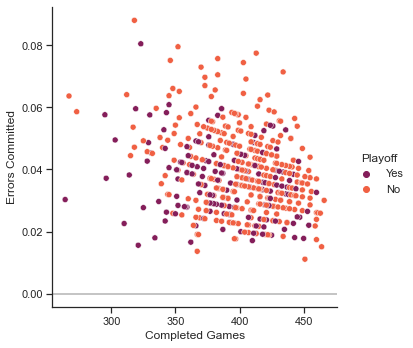

In [81]:
errors_and_games = sns.relplot(
    x=Outfield.CG, y=Outfield.E / Outfield.CG, 
    hue = Outfield.Playoff, palette = "rocket"
)

(errors_and_games.map(plt.axhline, y=0, color=".7")
  .set_axis_labels("Completed Games", "Errors Committed")
  .set_titles("Errors Committed and Completed Games"))
# seaborn 1

<AxesSubplot:xlabel='Playoff', ylabel='Fld%'>

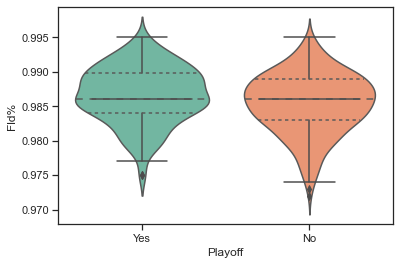

In [79]:
sns.set_theme(style="ticks")
playoff_field = sns.boxplot(x="Playoff", y="Fld%", data=Outfield, width=.6)
sns.violinplot(x="Playoff", y="Fld%", data=Outfield, inner="quartile",
                    order=["Yes", "No"], palette = "Set2")
# boxplot and violin plot

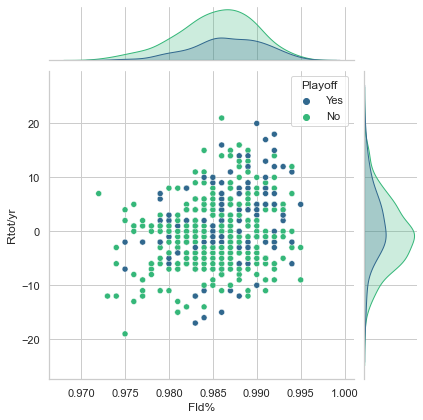

In [68]:
sns.set_theme(style="whitegrid")
sns.jointplot(data = Outfield, x = "Fld%", y = "Rtot/yr", hue = "Playoff", palette="viridis")
# seaborn 2

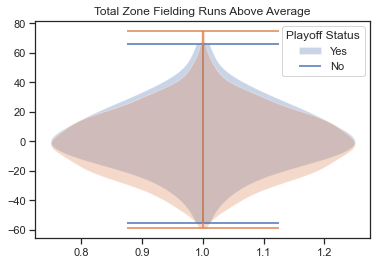

In [154]:
fig, (ax1) = plt.subplots(nrows = 1, ncols = 1)
ax1.violinplot(Outfield.loc[Outfield.Playoff == 'Yes', 'Rtz']) # total zone fielding runs abv avg
ax1.violinplot(Outfield.loc[Outfield.Playoff == 'No', 'Rtz'])  
ax1.set_title('Total Zone Fielding Runs Above Average')
ax1.legend(['Yes', 'No'], title = 'Playoff Status')
plt.show()

In [128]:
playoffNo = Outfield.loc[Outfield.Playoff != "Yes", ]
playoffYes = Outfield.loc[Outfield.Playoff != "No", ]

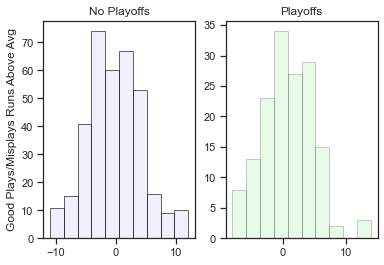

In [144]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
ax1.hist(playoffNo.Rgood, color = 'lavender', edgecolor = 'black', alpha = 0.6)
ax1.set_title('No Playoffs')
ax1.set_ylabel('Good Plays/Misplays Runs Above Avg')
ax2.hist(playoffYes.Rgood, color = 'lightgreen', edgecolor = 'black', alpha = 0.2)
ax2.set_title('Playoffs')
plt.show()